In [32]:
%matplotlib inline
import networkx as nx
import matplotlib.cm as cm
import matplotlib.pyplot as plt

In [36]:
import networkx as nx

## 1. 计算www网络中的节点数量和链接数量

In [50]:
G = nx.DiGraph()
n = 0
with open ('/Users/zhangyixin/Desktop/cjc2016-gh-pages/www.dat.gz.txt') as f:
    for line in f:
        n += 1
        x, y = line.rstrip().split(' ')
        G.add_edge(x,y)

In [38]:
nx.info(G)

'Name: \nType: DiGraph\nNumber of nodes: 325729\nNumber of edges: 1497134\nAverage in degree:   4.5963\nAverage out degree:   4.5963'

## 2. 描述www网络密度

In [39]:
nx.density(G)

1.4110719364589702e-05

In [40]:
nodeNum = len(G.nodes())
edgeNum = len(G.edges())

2.0*edgeNum/(nodeNum * (nodeNum - 1))

2.8221438729179403e-05

## 3. 绘制www网络的出度分布、入度分布

In [48]:
dc = nx.degree_centrality(G)
inness = nx.in_degree_centrality(G) 
outness = nx.out_degree_centrality(G)

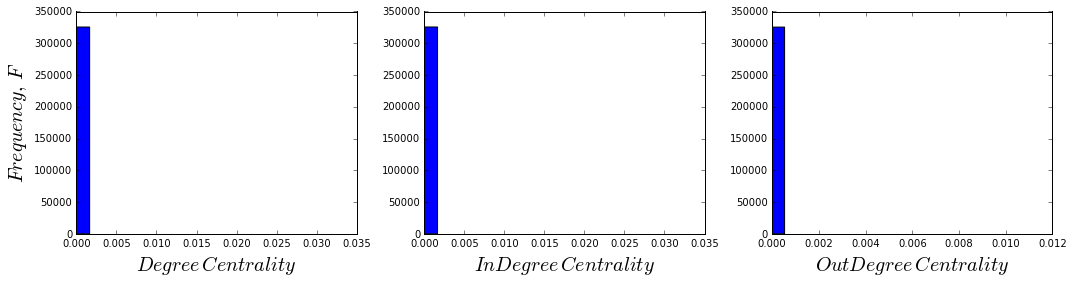

In [49]:
fig = plt.figure(figsize=(15, 4),facecolor='white')
ax = plt.subplot(1, 3, 1)
plt.hist(dc.values(), bins = 20)
plt.xlabel('$Degree \, Centrality$', fontsize = 20)
plt.ylabel('$Frequency, \, F$', fontsize = 20)

ax = plt.subplot(1, 3, 2)
plt.hist(inness.values(), bins = 20)
plt.xlabel('$InDegree \, Centrality$', fontsize = 20)

ax = plt.subplot(1, 3, 3)
plt.hist(outness.values(), bins = 20)
plt.xlabel('$OutDegree \, Centrality$', fontsize = 20)
plt.tight_layout()
plt.show()

## 4. 使用BA模型生成节点数为m取值为2，N取值分别为10、100、1000、10000时，绘制平均路径长度d与节点数量的关系

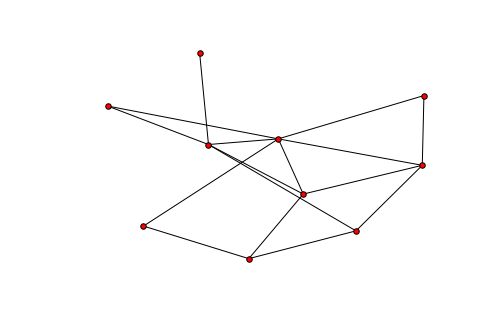

In [51]:
import networkx as nx
import matplotlib.pyplot as plt
BA= nx.random_graphs.barabasi_albert_graph(10,2)  
pos = nx.spring_layout(BA)         
nx.draw(BA,pos,with_labels=False,node_size = 30)  
plt.show()

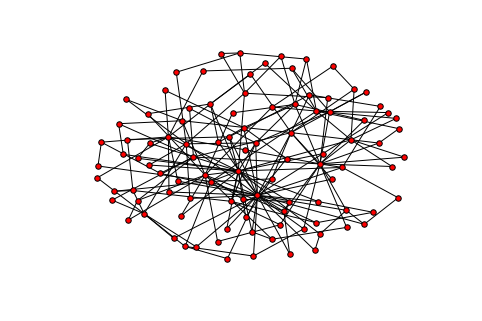

In [52]:
import networkx as nx
import matplotlib.pyplot as plt
BA= nx.random_graphs.barabasi_albert_graph(100,2)  
pos = nx.spring_layout(BA)         
nx.draw(BA,pos,with_labels=False,node_size = 30)  
plt.show()

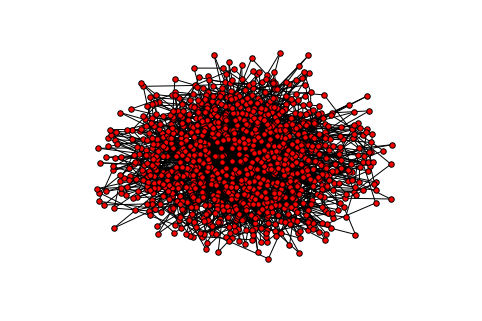

In [53]:
import networkx as nx
import matplotlib.pyplot as plt
BA= nx.random_graphs.barabasi_albert_graph(1000,2)  
pos = nx.spring_layout(BA)         
nx.draw(BA,pos,with_labels=False,node_size = 30)  
plt.show()

In [54]:
Ns = [i*10 for i in [1, 10, 100, 1000]]
ds = []
for N in Ns:
    print N
    BA= nx.random_graphs.barabasi_albert_graph(N,2)
    d = nx.average_shortest_path_length(BA)
    ds.append(d)

10
100
1000
10000


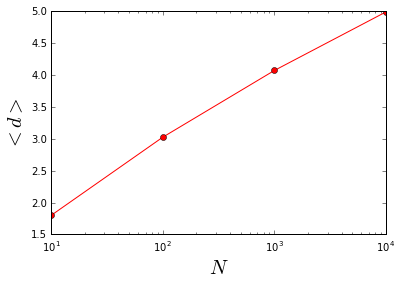

In [55]:
plt.plot(Ns, ds, 'r-o')
plt.xlabel('$N$', fontsize = 20)
plt.ylabel('$<d>$', fontsize = 20)
plt.xscale('log')
plt.show()